### Analise exploratoria dos dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
### Parametros
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

### Data

In [3]:
names = ["lettr", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", "x2bar", 
         "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
df = pd.read_csv("./data/letter-recognition.data",names=names, header=None)

df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
df.isnull().any()

lettr    False
x-box    False
y-box    False
width    False
high     False
onpix    False
x-bar    False
y-bar    False
x2bar    False
y2bar    False
xybar    False
x2ybr    False
xy2br    False
x-ege    False
xegvy    False
y-ege    False
yegvx    False
dtype: bool

### Distribuição das classes

<BarContainer object of 26 artists>

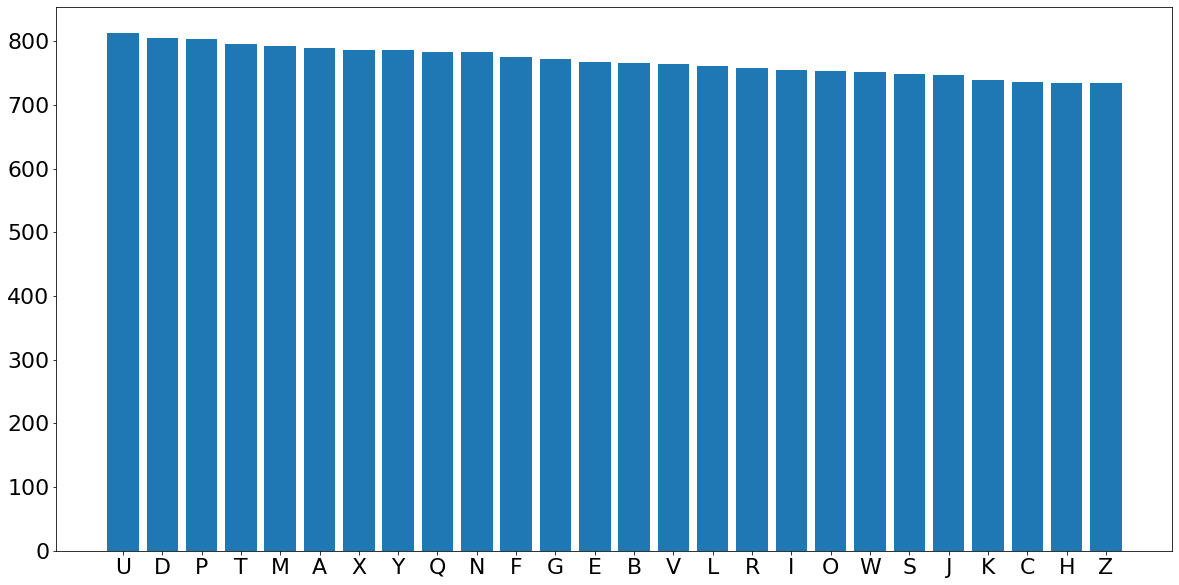

In [6]:
dist = df['lettr'].value_counts()
plt.bar(dist.index, dist.values)

### Valores medios/std para cada classe

In [7]:
def group_by(df, col_name, target_name):
    """
    Agrupa os valores pela media e std em relação a classe alvo
    """
    df_tmp = df[[target_name, col_name]]
    groupby = df_tmp.groupby([target_name])

    mean = groupby.mean()
    std = groupby.std()
    
    return mean[col_name], std[col_name]

def plot(mean, std, title, xlabel):
    """
    plot bar htaph with mean and std
    """
    fig, ax = plt.subplots(1)
    # plot
    ax.bar(mean.index, mean.values, yerr=std, align='center', alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

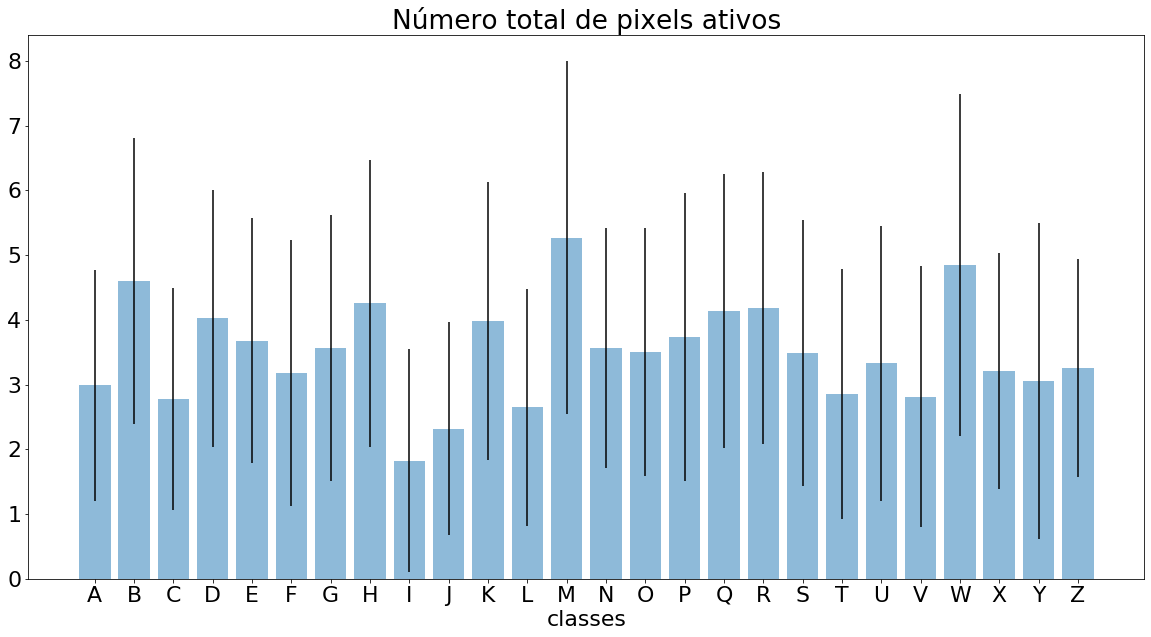

In [8]:
mean, std = group_by(df, "onpix", "lettr")

plot(mean, std, "Número total de pixels ativos", "classes")

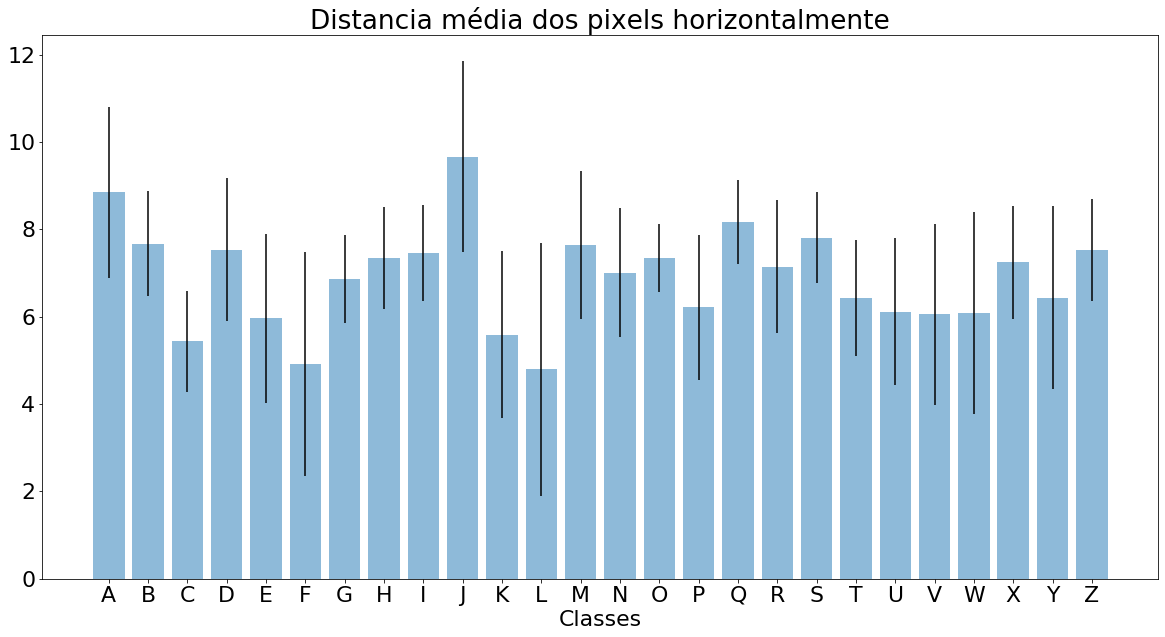

In [9]:
mean, std = group_by(df, "x-bar", "lettr")

plot(mean, std, "Distancia média dos pixels horizontalmente", "Classes")

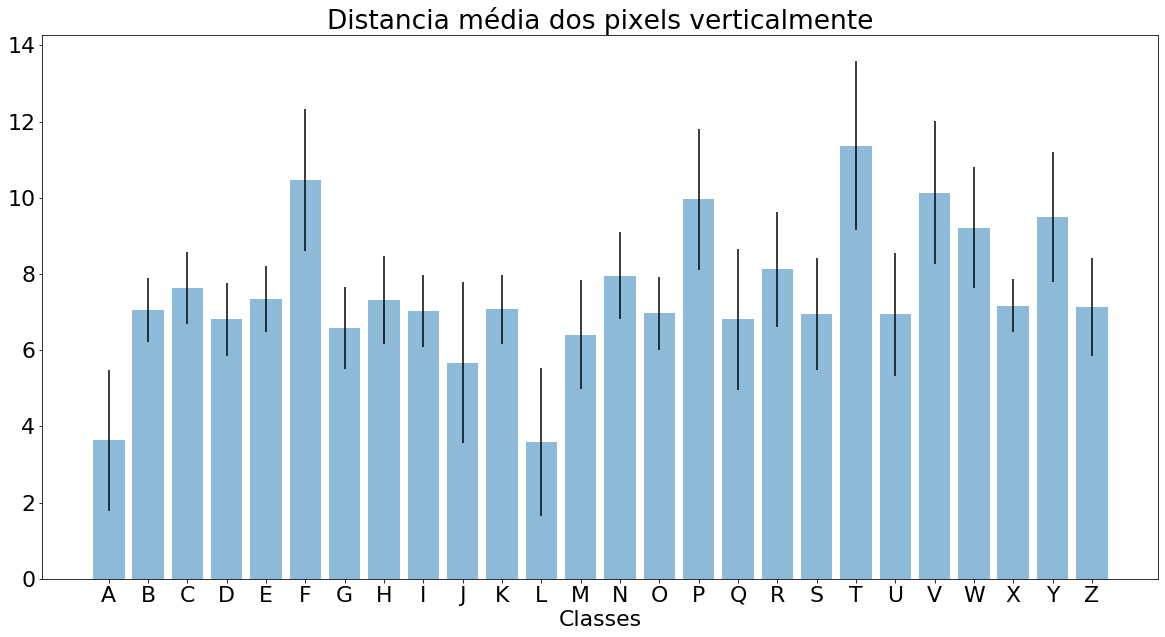

In [10]:
mean, std = group_by(df, "y-bar", "lettr")

plot(mean, std, "Distancia média dos pixels verticalmente", "Classes")

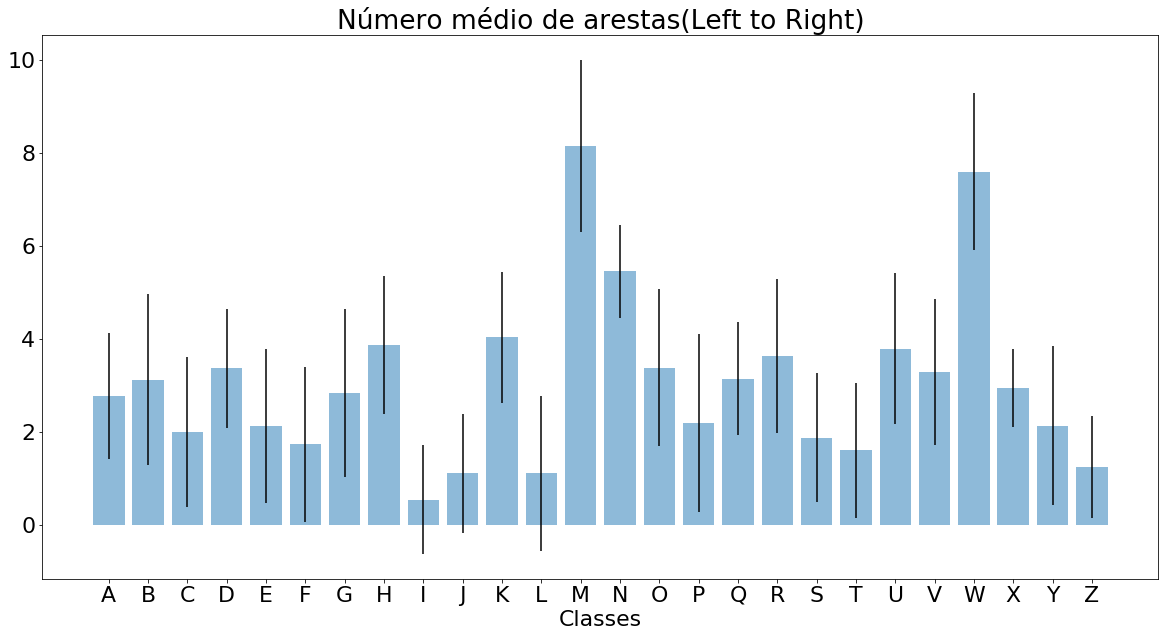

In [14]:
mean, std = group_by(df, "x-ege", "lettr")

plot(mean, std, "Número médio de arestas(Left to Right)", "Classes")
#(um pixel "ativado" imediatamente à direita de um pixel "desativado" ou o limite da imagem)

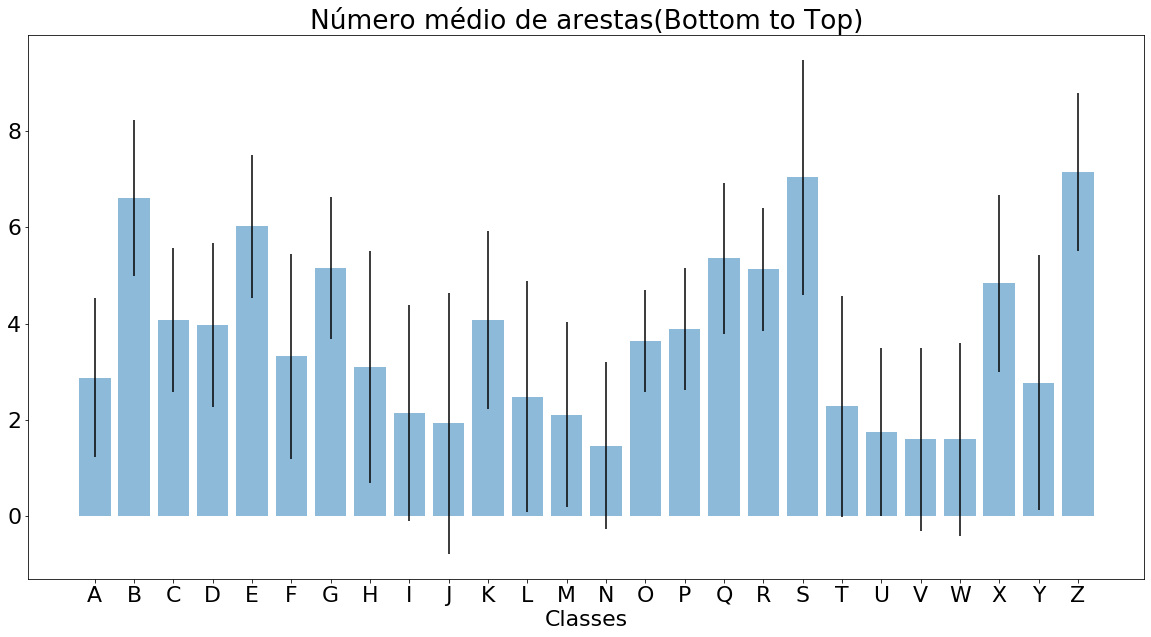

In [12]:
mean, std = group_by(df, "y-ege", "lettr")

plot(mean, std, "Número médio de arestas(Bottom to Top)", "Classes")
#(um pixel "ligado" imediatamente acima de um pixel "desligado" ou o limite da imagem) 

### Correlação

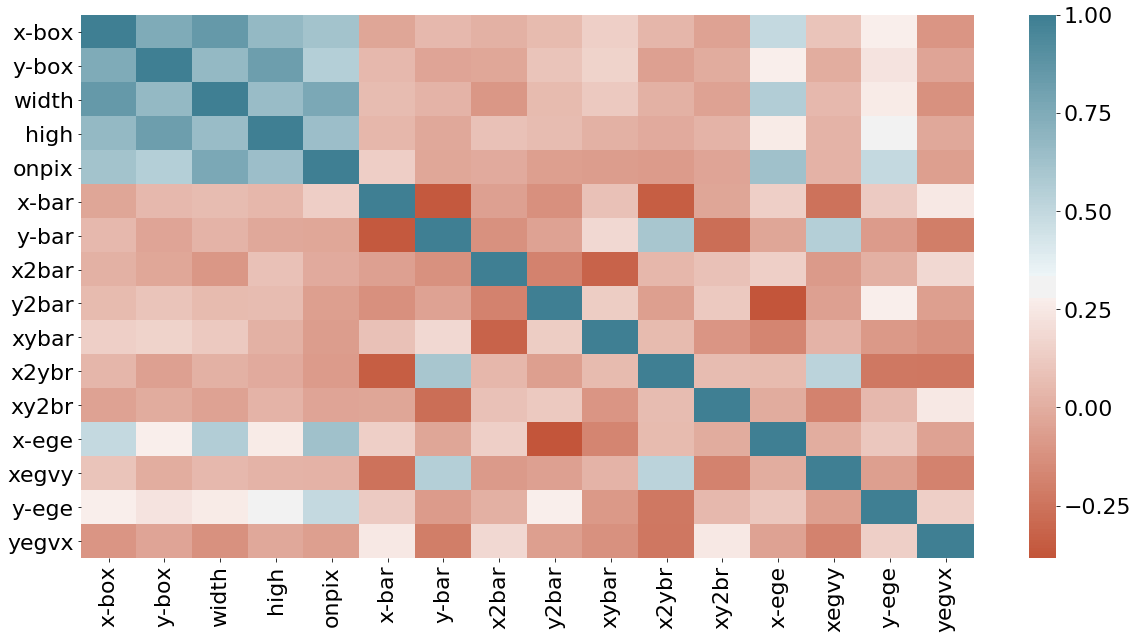

In [13]:
corr = df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))